In [1]:
# baseline cnn model for mnist
import cv2 as cv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import os
from skimage.io import imread
from matplotlib import cm
from scipy.ndimage import gaussian_filter
from skimage.color import rgb2gray
import math

# Imagen que se va a utilizar

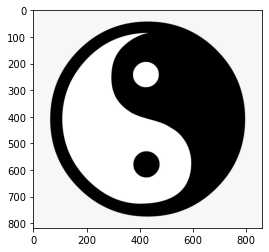

In [2]:

imagen = plt.imread("m.png")
plt.imshow(imagen)

# Lectura de la foto

In [3]:
#Utilizamos el flag 0 para que lea la imagen en escala de grises
data=imread('m.png',cv.IMREAD_GRAYSCALE)

In [12]:
data.shape

(818, 860, 4)

In [4]:
#Comprobamos los valores del array y que no son valores vacios
np.unique(data)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

# Algoritmo detección de bordes

# imagen a escala de grises

In [5]:
gray = rgb2gray(imagen)

<ipython-input-5-bfcf525f8d71>:1: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  gray = rgb2gray(imagen)


# 1. Filtro gaussiano

In [6]:
filtro = gaussian_filter(gray,sigma=1)

# 2. Supresion No maxima

In [7]:
# Encuentra el gradiente en la dirección X
grad_x = cv.Sobel(filtro, cv.CV_16SC1, 1, 0)
# Encuentra el gradiente en la dirección y
grad_y = cv.Sobel(filtro, cv.CV_16SC1, 0, 1)
# Convertir el valor del gradiente a 8 bits
x_grad = cv.convertScaleAbs(grad_x)
y_grad = cv.convertScaleAbs(grad_y)
# Combina dos gradientes
combina_grad = cv.addWeighted(x_grad, 0.5, y_grad, 0.5, 0)

In [8]:
combina_grad.shape

(818, 860)

# 3. Deteccion de bordes

In [9]:
# paso 4. Algoritmo de doble umbral para detectar y conectar bordes
filas, columnas = combina_grad.shape
imagen_final = np.zeros([filas, columnas])               
# Definir umbral alto y bajo
bajo = 0.2 * np.max(combina_grad)
alto = 0.3 * np.max(combina_grad)
for i in range(1, filas-1):
    for j in range(1, columnas-1):
        if (combina_grad[i, j] < bajo):
            imagen_final[i, j] = 0
        elif (combina_grad[i, j] > alto):
            imagen_final[i, j] = 1
        elif ((combina_grad[i-1, j-1:j+1] < alto).any() or (combina_grad[i+1, j-1:j+1]).any() 
              or (combina_grad[i, [j-1, j+1]] < alto).any()):
            imagen_final[i, j] = 1

In [10]:
cv.imwrite("img_final.png",imagen_final)

True

# Imagen final

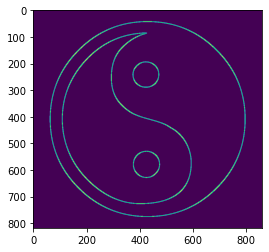

In [11]:
img_final = plt.imread("img_final.png")
plt.imshow(img_final)